In [1]:
# Necessary imports for correct working of algorithm. 
# This algorithm expects \*.fa files of soft masked species. Data for this plot has been downloaded from Ensembl.org
# Also, algorithm uses an improved version of parser (included) from dna_puller library that 
# reflects size diferrence ('a' vs 'A') of letters in sequences

%matplotlib inline

import os, json, csv

import matplotlib.pyplot as plt
from parser import Parser

In [3]:
unfiltered_files = os.listdir() # get list of files in current folder
filtered_files = []

for file in unfiltered_files: # filter only *.fa files
    if file[-3:] == '.fa':
        filtered_files.append(file)

In [9]:
fasta_data = {}
for file in filtered_files:
    fasta_data[file] = Parser.parse_file(file) # parse data from fasta file and count frequencies of letters for every gene
    with open(file + '.json', 'w') as fp: # and save them for future analysis
        json.dump(fasta_data[file], fp)

In [12]:
species = []

for spec in fasta_data.keys(): # generate species scientific name from filename 
    species.append(spec.split('.')[0])

In [17]:
aggregated_data = {}

# compute aggregated frequencies for every species
for species_key, data in fasta_data.items():
    species = species_key.split('.')[0]
    aggregated_data[species] = {}
    
    GC_count = 0
    gc_count = 0
    
    all_count = 0
    ALL_count = 0
    
    # compute aggregated frequencies from saved frequencies of genes
    for gene_key, letter_counts in data.items():
        gc_count += letter_counts['g'] + letter_counts['c'] + letter_counts['s']
        GC_count += letter_counts['G'] + letter_counts['C'] + letter_counts['S']
        
        aggregated_data[species]['gc'] = gc_count
        aggregated_data[species]['GC'] = GC_count
        
        all_count += letter_counts['g'] + letter_counts['c'] + letter_counts['s'] + letter_counts['a'] + letter_counts['t'] + letter_counts['w']
            
        ALL_count += letter_counts['G'] + letter_counts['C'] + letter_counts['S'] + letter_counts['A'] + letter_counts['T'] + letter_counts['W']
            
        aggregated_data[species]['all'] = all_count
        aggregated_data[species]['ALL'] = ALL_count

In [21]:
# save the aggregated frequecies to file for future analysis
with open('species_gc_GC.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['name', 'gc', 'GC', 'all', 'ALL'])
    for species, data in aggregated_data.items():
        writer.writerow([species, data['gc'], data['GC'], data['all'], data['ALL']])

In [22]:
gc_percent = []
GC_percent = []

# compute GC% and GC% from aggregated values for every species and save them to array for plotting
for _, data in aggregated_data.items():
    gc_percent.append(float(data['gc'])/float(data['all']))
    GC_percent.append(float(data['GC'])/float(data['ALL']))

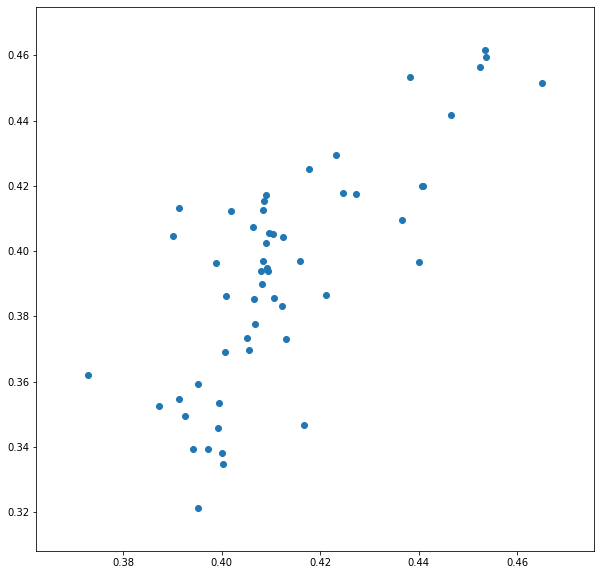

In [27]:
figure = plt.figure(figsize=(10,10))
# create the plot from computed data
plt.scatter(GC_percent, gc_percent)
plt.savefig('softmask_genomes.png')